# <a id=1></a>1 PCA 算法的 Python 实现
Numpy 的 `linalg` 模块实现了常见的线性代数运算，包括矩阵的特征值求解。

其中 `eig` 函数能够计算出给定方阵的特征值和对应的右特征向量。

我们实现函数 `principal_component_analysis`，其输入为数据集 $X$ 和主成分数量 $k$，返回降维后的数据、 $k$ 个主成分列表和对应的特征值列表。主成分按照特征值大小降序排序。

In [ ]:
import numpy as np
def principal_component_analysis(X, k):
    X = X - np.mean(X, axis=0)#对原始数据进行中心化处理
    sigma = X.T.dot(X)/(len(X)-1) # 计算协方差矩阵
    a,w = np.linalg.eig(sigma) # 计算协方差矩阵的特征值和特征向量
    sorted_indx = np.argsort(-a) # 将特征向量按照特征值进行排序
    X_new = X.dot(w[:,sorted_indx[0:k]])#对数据进行降维
    return X_new,w[:,sorted_indx[0:k]],a[sorted_indx[0:k]] #返回降维后的数据、主成分、对应特征值

## 生成一份随机的二维数据集
为了直观查看降维效果，我们借助 make_regression 生成一份用于线性回归的数据集。同时对两个维度均进行归一化。

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
# %matplotlib inline
x, y = datasets.make_regression(n_samples=200,n_features=1,noise=10,bias=20,random_state=111)
x = (x - x.mean())/(x.max()-x.min())
y = (y - y.mean())/(y.max()-y.min())
fig, ax = plt.subplots(figsize=(6, 6)) #设置图片大小
ax.scatter(x,y,color="#E4007F",s=50,alpha=0.4)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Text(0,0.5,'$x_2$')

## 使用 PCA 对数据集进行降维

In [ ]:
import pandas as pd
X = pd.DataFrame(x,columns=["x1"])
X["x2"] = y
print(X)
X_new,w,a = principal_component_analysis(X,1)

           x1        x2
0    0.067612  0.200185
1   -0.011281 -0.106182
2   -0.087242 -0.036588
3    0.182781  0.320682
4    0.079111  0.088757
..        ...       ...
195 -0.013505 -0.104626
196 -0.075593 -0.125643
197 -0.199232 -0.100470
198  0.064252  0.069866
199 -0.179909 -0.127265

[200 rows x 2 columns]


In [ ]:
w

array([[-0.67205069],
       [-0.74050514]])

### 将第一个主成分方向的直线绘制出来。
直线的斜率为 `w[1,0]/w[0,0]`。将主成分方向在散点图中绘制出来。

In [ ]:
w[1,0]/w[0,0]

1.1018590617259438

Text(0,0.5,'$x_2$')

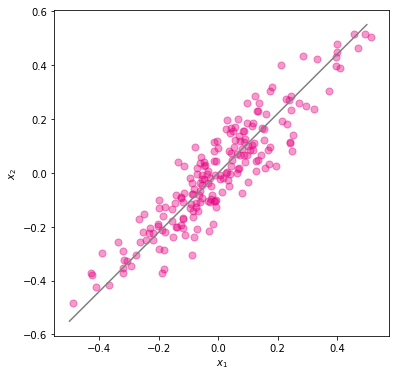

In [ ]:
import numpy as np
x1 = np.linspace(-.5, .5, 50)
x2 = (w[1,0]/w[0,0])*x1 
fig, ax = plt.subplots(figsize=(6, 6)) #设置图片大小
X = pd.DataFrame(x,columns=["x1"])
X["x2"] = y
ax.scatter(X["x1"],X["x2"],color="#E4007F",s=50,alpha=0.4)
ax.plot(x1,x2,c="gray") # 画出第一主成分直线
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

### 还可以将降维后的数据集使用散点图进行绘制

Text(0.5,0,'First principal component')

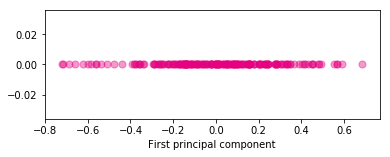

In [ ]:
import numpy as np
fig, ax = plt.subplots(figsize=(6, 2)) #设置图片大小
ax.scatter(X_new,np.zeros_like(X_new),color="#E4007F",s=50,alpha=0.4)
plt.xlabel("First principal component")

# 作业：基于 PCA 将人脸数据降低到30维


### 1 加载 olivettifaces 人脸数据集

Olivetti 人脸数据集。原始数据库可从(http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html)。我们使用的是 Sklearn 提供的版本。该版本是纽约大学 Sam Roweis的个人主页以 MATLAB 格式提供的。

数据集包括10个不同的人脸,每个人有40个不同的图像。对于某些对象，图像是在不同的时间、光线、面部表情（睁眼/闭眼、微笑/不微笑）和面部细节（眼镜/不戴眼镜）下拍摄。所有的图像都是在一个深色均匀的背景下拍摄的，被摄者处于直立的正面位置（可能有细微面部移动）。原始数据集图像大小为 92×112，而 Roweis 版本图像大小为 **64×64**。

### 2 使用 PCA 对人脸进行降维和特征脸提取
使用 PCA 将人脸数据降维到 30 维。